In [49]:
!pip install scikit-learn==0.24

In [50]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [136]:
tips= sns.load_dataset("tips")
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips['net_bill']=tips['total_bill']-tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## Modelo no valor da gorjeta

1. Definindo uma matriz de design a partir da variavél **tip** explicada pela **sex, smoker, time e net_bill**

In [137]:
y,X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill',tips)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.64e-20
Time:                        12:19:27   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

* As variaveis **sex,smoker e time** não parecem significativas para nosso modelo

2. Removendo as variaveis não significativas

In [138]:
y,X = patsy.dmatrices('tip ~ net_bill',tips)
model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 17 May 2023   Prob (F-statistic):           5.02e-23
Time:                        12:19:28   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

* Removemos as variaveis identificadas como não significantes **sex,smoker e time** 

3. Análise de residuo

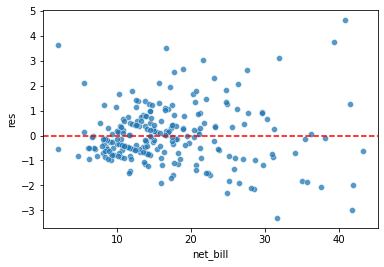

In [139]:
tips['res']=model.resid

sns.scatterplot(x ='net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

* É possível verificar uma tendência um pouco timida, conforme vai ficando maior o valor de **net_bill**. Vamos verificar a possibilidade de melhor o modelo. 

4. Transformando variavel preditora

In [140]:

y,X = patsy.dmatrices('tip ~ np.log(net_bill)',tips)
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 17 May 2023   Prob (F-statistic):           4.40e-20
Time:                        12:19:32   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

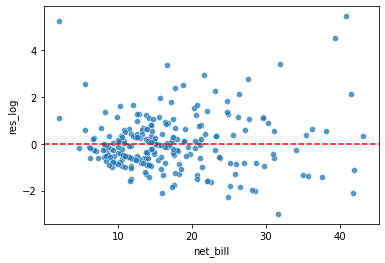

In [141]:
tips['res_log']=model.resid

sns.scatterplot(x ='net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [142]:
y,X = patsy.dmatrices('tip ~ np.power(net_bill,2)',tips)
model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.47e-20
Time:                        12:19:33   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

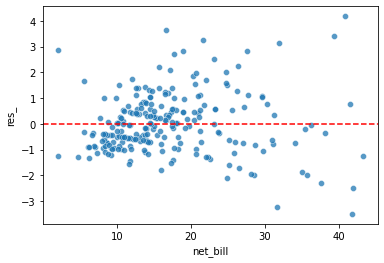

In [143]:
tips['res_']=model.resid

sns.scatterplot(x ='net_bill', y = 'res_', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Houve uma melhora consideravel após transformar **net_bill** em polinômio. 

## Modelo no valor do percentual da gorjeta

1. Definindo matriz de design no percentual da gorjeta

In [144]:
y,X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill',tips)
model2 = sm.OLS(y,X).fit()

print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Wed, 17 May 2023   Prob (F-statistic):           3.16e-13
Time:                        12:19:36   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.

* As variaveis **sex,smoker e time** não parecem significativas para nosso modelo

2. Removendo variaveis não significativas


In [145]:
y,X = patsy.dmatrices('np.log(tip_pct) ~ net_bill',tips)
model2 = sm.OLS(y,X).fit()

print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 17 May 2023   Prob (F-statistic):           8.27e-16
Time:                        12:19:38   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

 * Removemos as variaveis identificadas como não significantes **sex,smoker e time** 

3. Analise de residuo

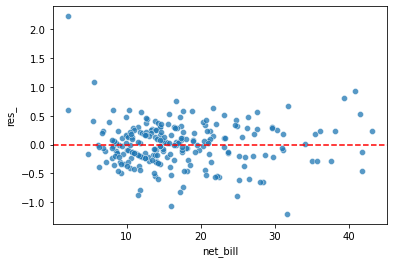

In [146]:
tips['res_']=model2.resid

sns.scatterplot(x ='net_bill', y = 'res_', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

É possível verificar uma pouco relação convexa. Vamos verificar a possibilidade de melhoria do nosso modelo

4.Transformando variavel preditora

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 17 May 2023   Prob (F-statistic):           5.20e-20
Time:                        12:19:44   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

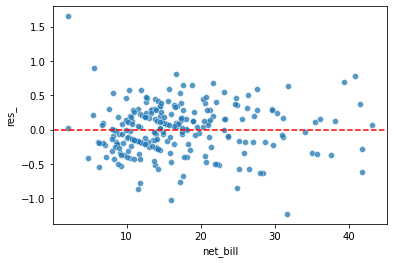

In [147]:
y,X = patsy.dmatrices('np.log(tip_pct) ~ np.log(net_bill)',tips)
model2 = sm.OLS(y,X).fit()

print(model2.summary())
tips['res_']=model2.resid

sns.scatterplot(x ='net_bill', y = 'res_', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     55.39
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.72e-12
Time:                        12:19:44   Log-Likelihood:                -113.59
No. Observations:                 244   AIC:                             231.2
Df Residuals:                     242   BIC:                             238.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.52

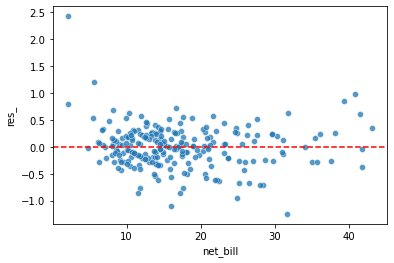

In [148]:

y,X = patsy.dmatrices('np.log(tip_pct) ~ np.power(net_bill,2)',tips)
model2 = sm.OLS(y,X).fit()

print(model2.summary())
tips['res_']=model2.resid

sns.scatterplot(x ='net_bill', y = 'res_', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

 * Acredito que para o percentual de gorjeta o modelo ficou melhor ao transformar a variavel preditora **net_bill** em log

5. Comparando o primeiro e segundo modelo

In [149]:
from sklearn.metrics import r2_score


In [150]:
y_true=tips['tip']
y_pct=tips['tip_pct']
model2 = smf.ols('tip_pct ~ np.power(net_bill,2)',data=tips).fit()

In [151]:
y_pred=model.fittedvalues
y_pred2=model2.fittedvalues
total_gorjeta=r2_score(y_true,y_pred)
percentual=r2_score(y_pct,y_pred2)
print(f'Modelo do valor total da gorjeta : %.2f%%'% (total_gorjeta*100))
print(f'Modelo do percentual da gorjeta : %.2f%%' % (percentual*100))

Modelo do valor total da gorjeta : 30.07%
Modelo do percentual da gorjeta : 5.28%


### Previsão de renda

1. Ajustando o modelo de regressão linear simples para explicar a **renda** a partir da variável **tempo de emprego** 

In [93]:
renda=pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [94]:
renda['renda'].shape

(15000,)

In [95]:
renda.groupby('renda')['tempo_emprego'].mean()

renda
118.71        1.616438
211.04        6.090411
222.87             NaN
238.20             NaN
249.14        1.098630
               ...    
154006.23    26.931507
166223.85    30.364384
172748.39    20.189041
179538.80    40.786301
245141.67    33.569863
Name: tempo_emprego, Length: 9786, dtype: float64

In [96]:
model = smf.ols('renda ~ tempo_emprego',data=renda).fit()
renda['res']=model.resid

renda['res'].shape


(15000,)

In [97]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        12:15:14   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

* Para cada 510 dias a mais de tempo de emprego maior será a renda

2. Análise de residuo

In [98]:
renda.shape

(15000, 16)

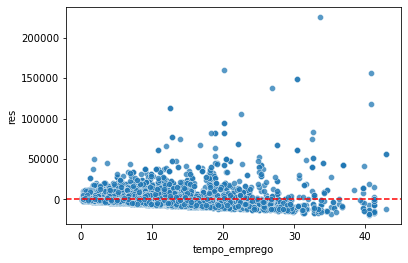

In [99]:
model = smf.ols('renda ~ tempo_emprego',data=renda).fit()
renda['res']=model.resid

sns.scatterplot(x ='tempo_emprego', y = 'res', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

* É possível verificar uma tendência, uma concentração dos residuos quando o tempo de emprego é menor.

In [100]:
model2 = smf.ols('np.log(renda) ~ tempo_emprego',data=renda).fit()

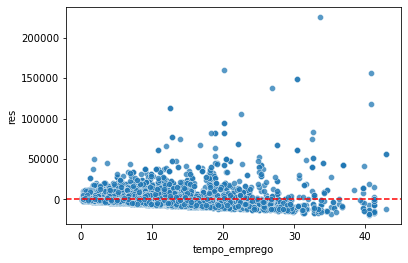

In [101]:
sns.scatterplot(x ='tempo_emprego', y = 'res', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

* Ao transformar em log a variável predita é possível verificar que houve uma melhora no modelo. 

3. Ajustando o modelo de regressão multipla com as de mais variavéis 

In [102]:
model3 = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia',data=renda).fit()


In [103]:

renda['res']=model3.resid
renda['res'].shape

(15000,)

In [104]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     112.7
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        12:15:25   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12388   BIC:                         2.579e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

* Vemos que para as variaveis **data_ref,posse_de_veiculo,tipo_renda,educacao,estado_civil,qtd_filhos,qt_pessoas_residencia, e tipo_residencia** não parecem significativa para ajudar a explicar a variavél **renda**, sendo assim, vamos remover essas variavéis. 

4. Removendo variavél não significante para o modelo

In [105]:
y_renda=renda['renda']
reg=smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego +  qt_pessoas_residencia',data=renda).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     839.2
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        12:15:28   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

* Ao remover variaveis não significativas para o modelo a variavel **qt_pessoas_residencia** tornou-se significativa na ausencia das demais. 

In [106]:
reg=smf.ols('np.log(renda) ~ C(sexo) + C(posse_de_imovel) + np.log(idade) + tempo_emprego + np.log(qt_pessoas_residencia)',data=renda).fit()
reg

In [107]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1312.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        12:15:31   Log-Likelihood:                -13682.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12421   BIC:                         2.742e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

1. **sexo** masculino ganham *0.7872* a mais que as mulheres;
2. **posse_de_imovel** pessoas que possuem imovel ganham *0.0889*;
3. **log da idade** para cada *0.1838* log da idade maior será a renda;
4. **tempo_emprego** a cada *0.0609* a mais de tempo de emprego mais será a renda;
5. **log qt_pessoas_residencia** para cada *0.0360* do log da quantidade de pessoas na residencia maior será a renda;


5. Analise de residuo

In [108]:
renda['res']=reg.resid

<AxesSubplot:xlabel='sexo', ylabel='res'>

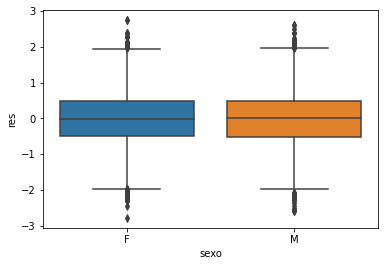

In [109]:
sns.boxplot(x ='sexo', y = 'res', data = renda)


<AxesSubplot:xlabel='posse_de_imovel', ylabel='res'>

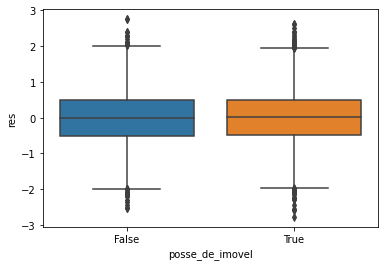

In [110]:
sns.boxplot(x ='posse_de_imovel', y = 'res', data = renda)

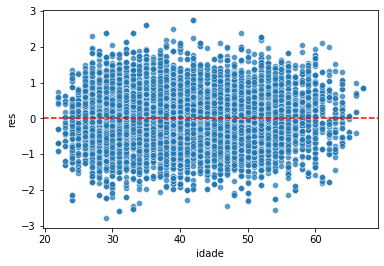

In [111]:
sns.scatterplot(x ='idade', y = 'res', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


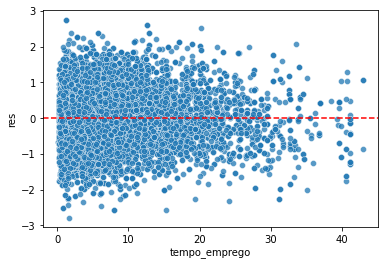

In [112]:
sns.scatterplot(x ='tempo_emprego', y = 'res', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


* Após a transformação nas variaveis preditoras e predita houve uma melhora consideravel no modelo e no R2, antes da trnasformação existia padrão evidente para a maioria das variaveis. 